In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

#Algorithm 2 : Backtracking (Inexact) Line Search
Require : $ x_k, p_k, α_0, ρ ∈ (0, 1), γ ∈ (0, 1)$

1: Initialize $α = α_0, p_k = −∇f(x_k)$

2: while $f(x_k + αp_k) > f(x_k) + γα∇f(x_k)^⊤p_k$ do

3: α = ρα

4: Output: α

**1. Consider the function g(x) from Exercise-1 for this part and with the starting point $x_0 = (100, 100)$ and
$τ = 10^{−10}$, we will investigate the behavior of the backtracking line search algorithm for different choices of
α0. Set γ = ρ = 0.5 and try $α_0$ ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}. For each $α_0$, record the final
minimizer, final objective function value, and the number of iterations taken by the gradient descent algorithm
with backtracking line search to terminate. Generate a plot where the number of iterations is plotted against
α0 values. Provide observations on the results, and comment on the minimizers and objective function values
obtained for different choices of $α_0$. Check and comment if, for any $α_0$ value, gradient descent with backtracking
line search takes a lesser number of iterations compared to the gradient descent procedure with exact line search.
Plot the level sets of the function g(x) and also plot the trajectory of the optimization on the same plot for
both inexact line search method and the fixed step length method of gradient descent algorithm and report your
observations.**


In [13]:
def g(x):
  return (x[0] + 49)**2 + (x[1] - 36)**2
def grad_g(x):
  return np.array([2*(x[0]+49)  ,  2*(x[1]-36)])

def backtraking_line_search(x0,g,gamma,alpha):
  x = x0
  k = 0
  grad = np.array(grad_g(x))
  while g(x - alpha*grad)  > g(x) - gamma*alpha*(grad @ grad):
    alpha  = gamma * alpha
    k = k+1
  return k,alpha

def grad_descent(g,grad_g,x0,tolerance,step_size):
  x = x0
  k = 0
  while np.linalg.norm(grad_g(x)) >tolerance:
    x = x - step_size*grad_g(x)
    k = k+1
  return x,k


In [17]:
x0 = np.array([100,100])
alpha = 1
gamma = 0.5
alphas = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iteration1 = []
step_sizes1 = []
for alpha in alphas:

   k , alpha =  backtraking_line_search(x0,g,gamma,alpha)
   no_of_iteration1.append(k)
   step_sizes1.append(alpha)


In [15]:
step_sizes1

[0.5, 0.45, 0.375, 0.3, 0.5, 0.4, 0.25, 0.1, 0.01]

In [19]:
no_of_iteration1

[1, 1, 1, 1, 0, 0, 0, 0, 0]

# Gradient descent using the above step_sizes

In [20]:
tolerance = 10**-10
minimizers1 = []
num_iterations1 = []
for step_size in step_sizes1:

    minimizer,k= grad_descent(g,grad_g,x0,tolerance,step_size)
    minimizers1.append(minimizer)
    num_iterations1.append(k)


In [21]:
num_iterations1

[1, 13, 21, 32, 1, 18, 42, 130, 1426]

In [22]:
minimizers1

[array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.]),
 array([-49.,  36.])]

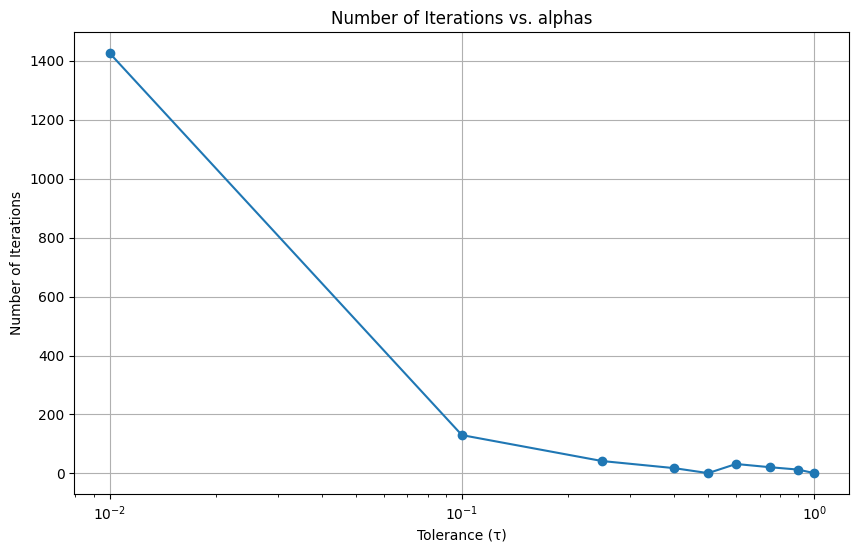

In [23]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, num_iterations1
             , marker='o')
plt.title('Number of Iterations vs. alphas')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.grid(True)
plt.show()

#Gradient descent using the step_size = 0.001

In [28]:
tolerance = 10**-10

minimizer,k= grad_descent(g,grad_g,x0,tolerance,step_size = 0.001)
print('minimizer : ',minimizer)
print('No of iteratioons : ', k)

minimizer :  [-49.  36.]
No of iteratioons :  14390


**2. Redo (1) using the function f(x) from Exercise-1 and also keep in mind the answer of the part (2) from
Exercise-1.**

$ f(x) = f(x_1,x_2) = 256(x_2 - x_1^2)^2 + (2-x_1)^2 $

In [30]:
def f(x):
  return 256*(x[1] - x[0]**2)**2+(2 - x[1])**2
def grad_f(x):
  return np.array([-1024*x[0]*(x[1] - x[0]**2) - 2*(2 - x[0]) , 512*(x[1] - x[0]**2)])


def inexact_line_search(x0,f,gamma,alpha):
  x = x0
  k = 0
  grad = np.array(grad_f(x))
  while f(x - alpha*grad)  > f(x) - gamma*alpha*(grad @ grad):
    alpha  = gamma * alpha
    k = k+1
  return k,alpha


In [31]:
no_of_iteration1 = []
step_sizes1 = []
x0 = np.array([100,100])
for alpha in alphas:

   k , alpha =  inexact_line_search(x0,f,gamma,alpha)
   no_of_iteration1.append(k)
   step_sizes1.append(alpha)


<ipython-input-30-df0bbdaae498>:2: RuntimeWarning: overflow encountered in long_scalars
  return 256*(x[1] - x[0]**2)**2+(2 - x[1])**2


In [32]:
step_sizes1

[2.9802322387695312e-08,
 2.6822090148925782e-08,
 2.2351741790771484e-08,
 3.5762786865234374e-08,
 2.9802322387695312e-08,
 2.384185791015625e-08,
 2.9802322387695312e-08,
 2.384185791015625e-08,
 3.814697265625e-08]

In [ ]:
tolerance = 10**-10
minimizers1 = []
num_iterations1 = []
for step_size in step_sizes1:

    minimizer,k= grad_descent(f,grad_f,x0,tolerance,step_size)
    minimizers1.append(minimizer)
    num_iterations1.append(k)

In [ ]:
minimizers1

[array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf]),
 array([-inf,  inf])]

In [ ]:
num_iterations1

[5, 5, 5, 5, 5, 5, 5, 5, 5]

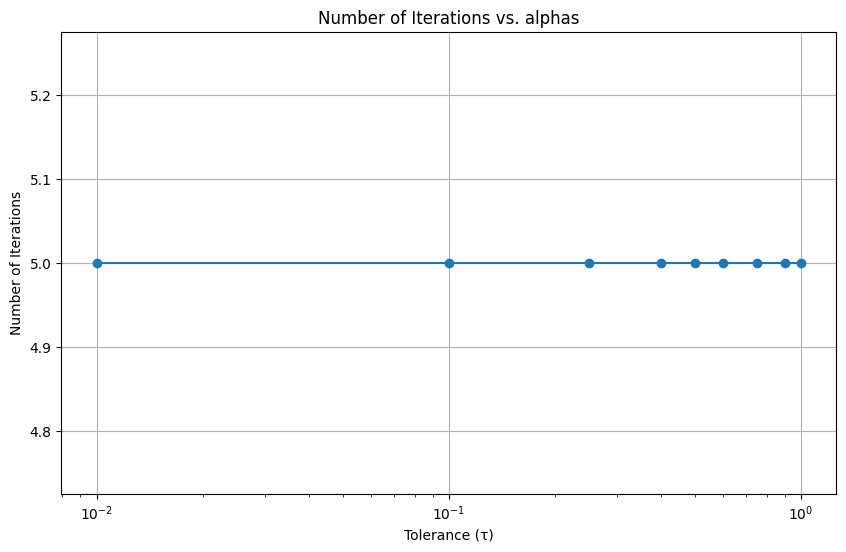

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, num_iterations1, marker='o')
plt.title('Number of Iterations vs. alphas')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.grid(True)
plt.show()